In [95]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

data_file = "data/quasar_train.csv"
data_train = np.genfromtxt(data_file, delimiter=",")

[ 2.51339906e+00 -9.81122145e-04]
[[   1 1100]
 [   1 1600]]
[1.4341647  0.94360362]


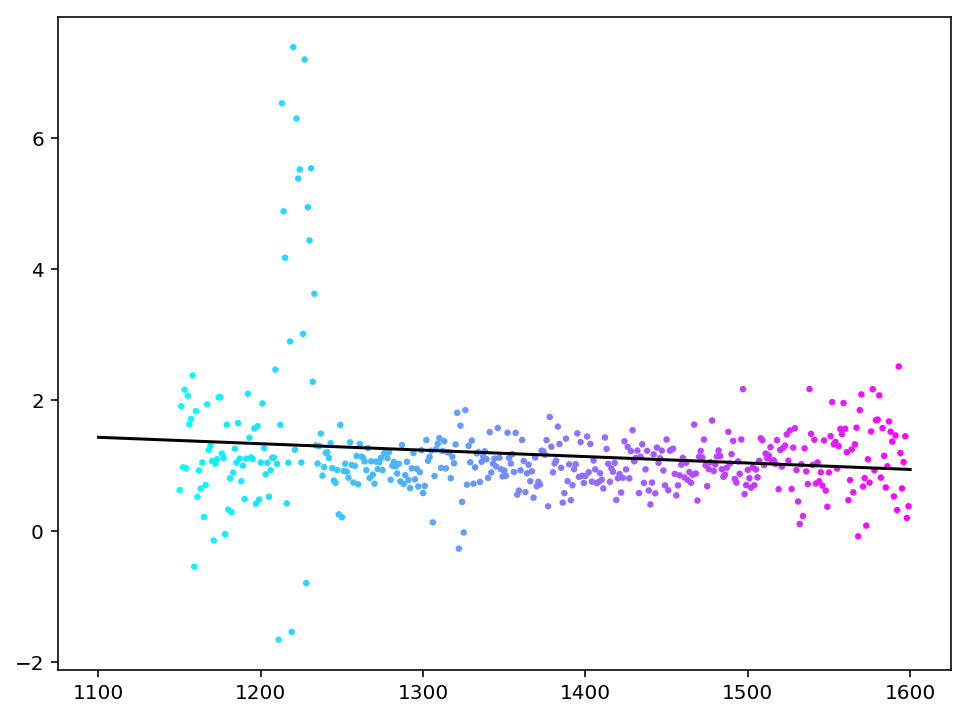

In [127]:
def fit_row_1(data_train):
    spectrum = data_train[0, :] # first row
    flux = data_train[1, :] # second row

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(spectrum, flux, s=5, c=spectrum, cmap='cool')

    n = spectrum.shape[0]

    # although this is the first training example, there are actually many x and y values
    # we can actually think of it as many training examples, modeling:
    # Ax + B = y 
    # where x is one value of lambda and y is the flux

    x = np.insert(spectrum.reshape(-1, 1), 0, values=1, axis=1)
    y = flux

    theta_pred = (np.linalg.pinv(x.T @ x) @ x.T) @ y
    print(theta_pred)

    line_x = np.asarray([1100, 1600]).reshape(-1, 1)
    print(np.insert(line_x, 0, values=1, axis=1))
    line_y = np.insert(line_x, 0, values=1, axis=1) @ theta_pred
    
    print(line_y)
    ax.plot(line_x, line_y, c='black')

fit_row_1(data_train)